# Hyperparameter Tuning: Group Assignment #2
------------------------------------
**Dr. Dave Wanik - OPIM 5512: Data Science Using Python - University of Connecticut**

-----------------------------

**Your Name Here:**

We all know accepting the model defaults for sklearn models will give you a reasonable model - but let's push ourselves to get the best model possible!

# Rubric
* If you haven't already, sign up for a ChatGPT account (most students have likely already done this!)
  * Go to this website https://openai.com/blog/chatgpt and click 'Try Now' which will require to make an account
* Now that you are set up with ChatGPT, let's have some fun. Go to the list of sklearn regression models and **pick ONE regression model** that we haven't covered in class like SVM) that you would like to perform hyperparameter tuning.
  * Here are the list of sklearn models: https://scikit-learn.org/stable/supervised_learning.html
  * You can ask ChatGPT something like 'show me how to do hyperparameter tuning on a XYZ model in python (sklearn) and return the best model to predict the test dataset'. Take a screenshot of your output and upload it as an image in your notebook.
* (30 points) Now copy/paste the code into Colab use the raw output from ChatGPT on the CA housing training dataset and then apply to the CA housing test dataset. Make sure you make scatterplots of actual vs. predicted values and calculate error metrics for each partition (R2, MAE, RMSE).
* (30 points) Then play with the values for the grid search (and feel free to add others) and see if you were able to get a better architecture than ChatGPT. You will need to create error metrics and scatterplots for each partition again in order to compare your results.
* (20 points) Students will post to HuskyCT forum for peer review - thoughtful comments must be given (what was good, what could be improved, something new that could be added.)
  * After posting their script for review for peer feedback (as both as shareable link viewable to anyone with the link and as an uploaded file to HuskyCT), students will compare each others code quality and captions (business value of plot and table) and make a suggestions for improvement.
* (20 points) Lastly, make five detailed bullet points about what you learned on your own and what you learned from others during this assignment. Make note of whether or not your grid search was able to beat ChatGPT's grid search and use numbers to back-up your conclusions!

## Examples of common feedback items on HuskyCT
* "For your grid search, you may want to try (larger or smaller) values for X"
* "Your script could be cleaned up a bit, please add some headers and text narrative cells so it is easier to read"
* "I never heard of that algorithm before - I was reading the documentation and noticed this hyperparameter X, maybe you should add it and some candidate values like 1, 10, 100?"
* "If you have such bad results with this model, why don't you choose another one that acts a little more friendly? Not all models are suited to each dataset.'

# Data Processing

In [1]:
# your code here - read the data from the sample data in Colab

In [2]:
import pandas as pd

In [3]:
# your code here - read the data from the sample data in Colab
df = pd.read_csv('/content/sample_data/california_housing_train.csv')

In [4]:
print("This is the shape :\n", df.shape, '\n')
print("These are the column names: \n", df.columns, '\n')
print("These are the data types: \n", df.dtypes)

This is the shape :
 (17000, 9) 

These are the column names: 
 Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object') 

These are the data types: 
 longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object


In [5]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [7]:
# the target variable is Y
y = df['median_house_value']
print(y.shape) # a single column

(17000,)


In [8]:
# everything else is X
# so just drop 'medv' and you are done
X = df.drop('median_house_value', axis=1)
print(X.shape) # note that we have gone from 9 to 8 columns, this is good! 17k rows.

(17000, 8)


# ChatGPT grid search

Here is an example of a ChatGPT screenshot - download locally to your computer then upload using the image icon in the toolbar. Use a separate text cell to keep things clean like I do!

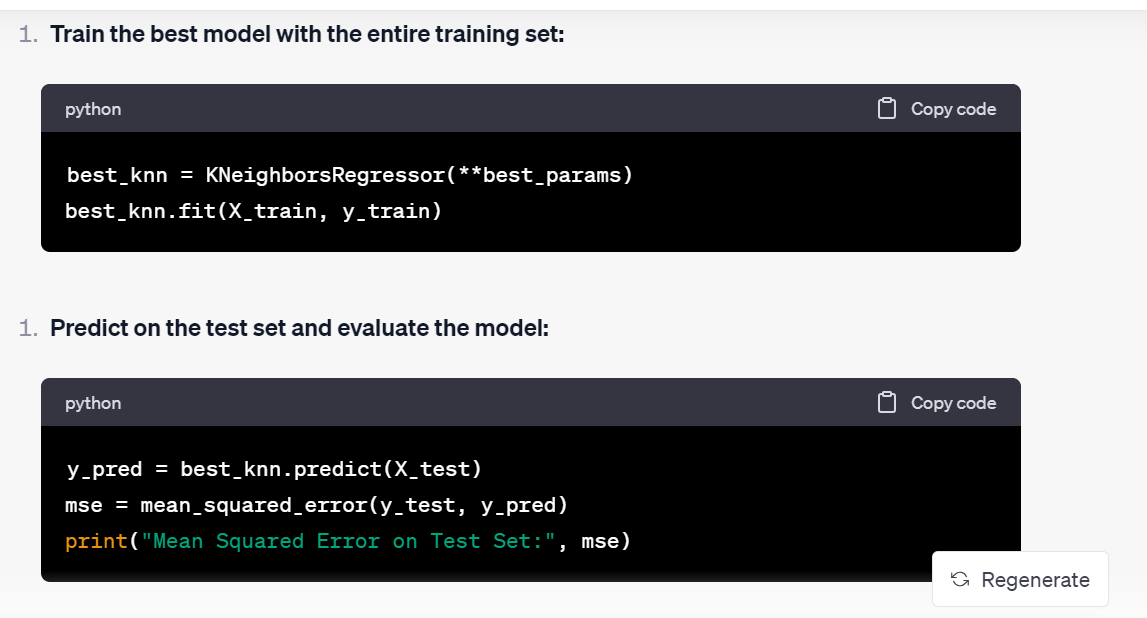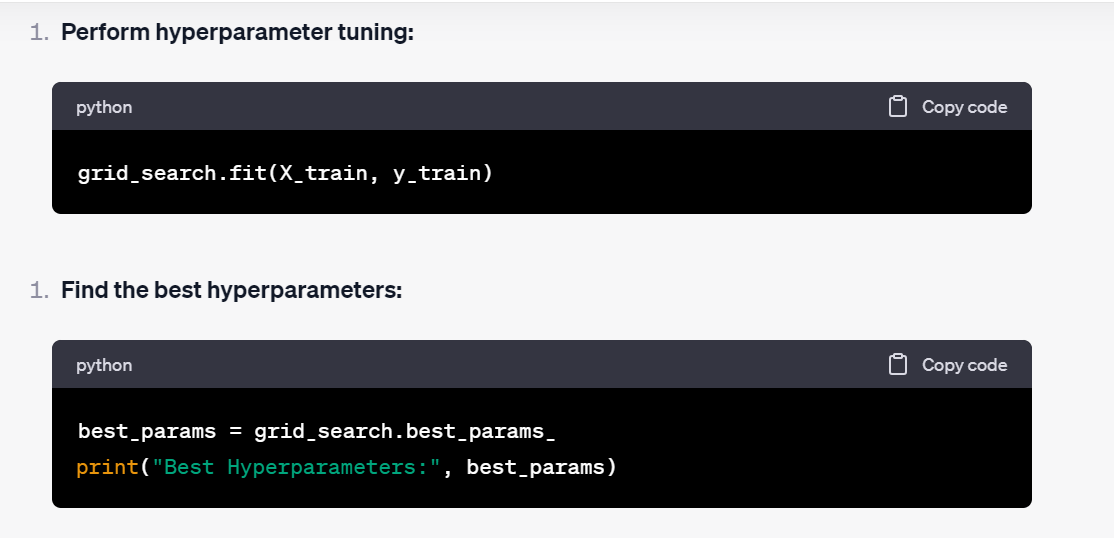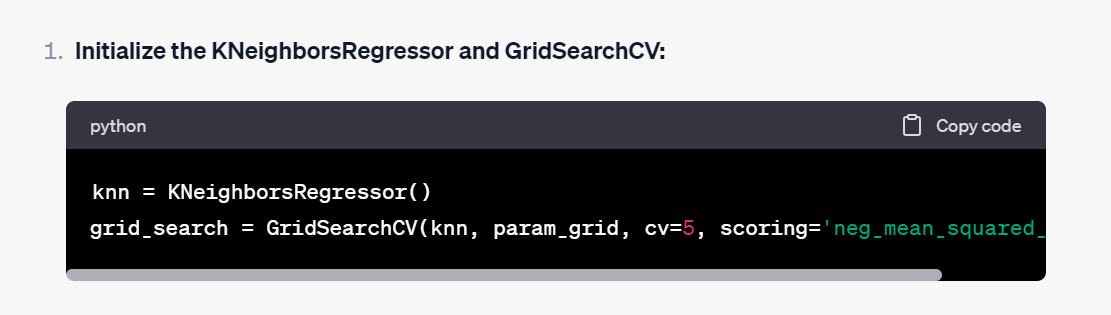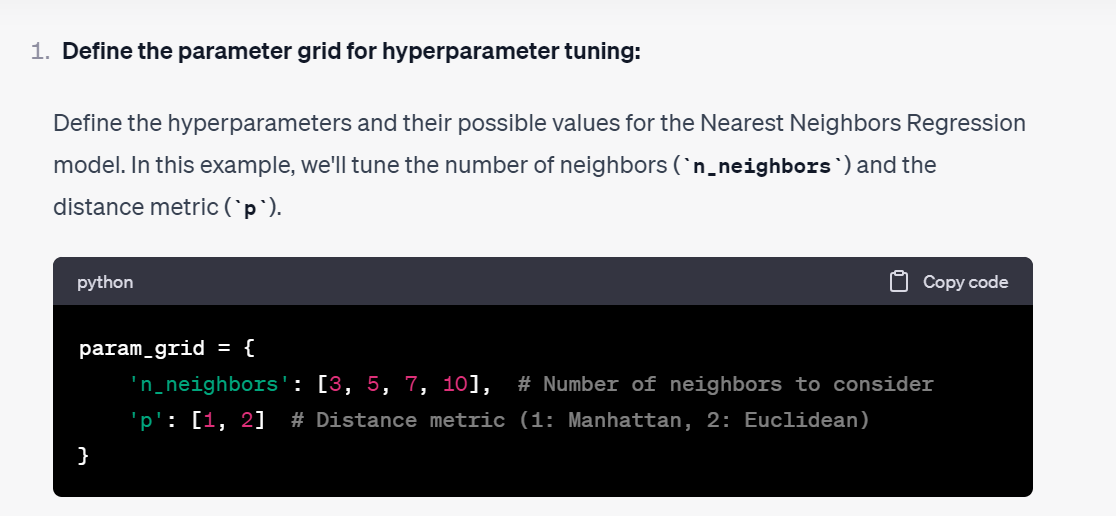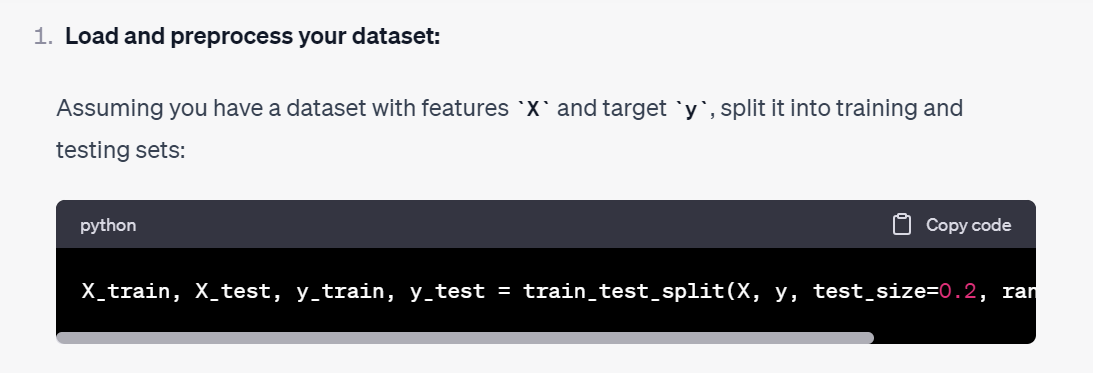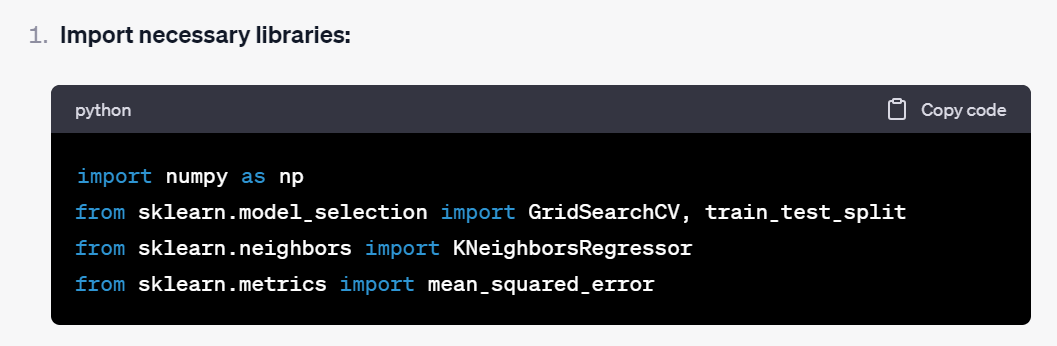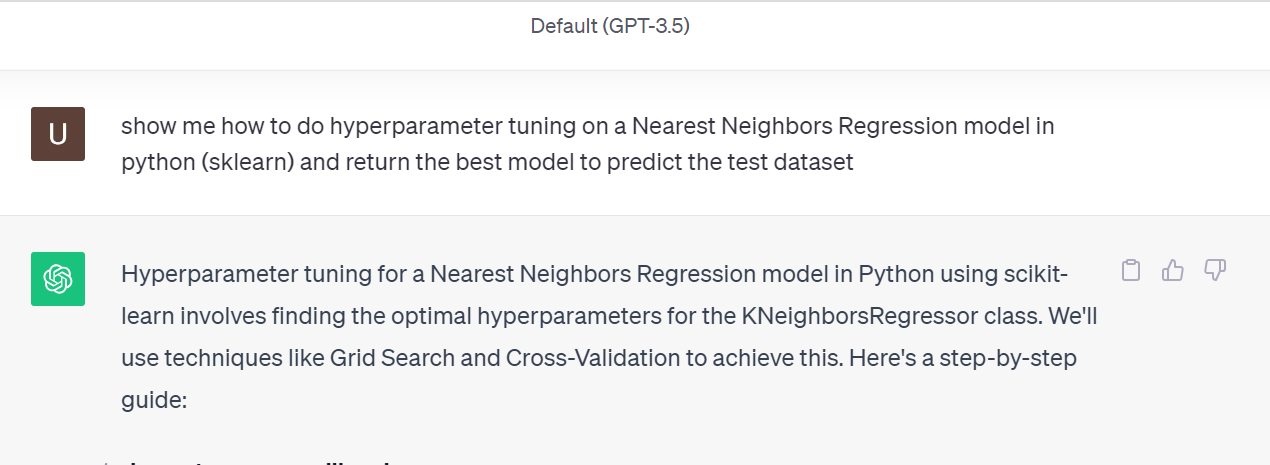

In [9]:
# your code here

In [8]:
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
param_grid = {
    'n_neighbors': [3, 5, 7, 10],  # Number of neighbors to consider
    'p': [1, 2]  # Distance metric (1: Manhattan, 2: Euclidean)
}


In [11]:
knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')

In [12]:
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 5, 7, 10], 'p': [1, 2]},
             scoring='neg_mean_squared_error')

In [13]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'n_neighbors': 10, 'p': 1}


In [14]:
best_knn = KNeighborsRegressor(**best_params)
best_knn.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=10, p=1)

In [15]:
y_pred = best_knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)


Mean Squared Error on Test Set: 9255689871.206146


In [16]:
y_pred = best_knn.predict(X_test)
mae = mean_squared_error(y_test, y_pred, squared = False)
print("Mean Squared Error on Test Set:", mae)

Mean Squared Error on Test Set: 96206.49599276624


In [17]:
# Calculate the Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [18]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error (MAPE) on Test Set:", mape)

Mean Absolute Percentage Error (MAPE) on Test Set: 48.52669683282003


In [19]:
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) on Test Set:", r2)

R-squared (R2) on Test Set: 0.32826824540086474


# My grid search

In [9]:
# copy/paste the code from above and make tweaks
# add different values for hyperparamters and feel
# free to add others that ChatGPT might have missed
# by looking at the documentation

In [10]:
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
param_grid = {
    'n_neighbors': [3, 5, 7, 10],  # Number of neighbors to consider
    'p': [1, 2],  # Distance metric (1: Manhattan, 2: Euclidean)
    'weights': ['distance']
}

In [13]:
knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')

In [14]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 5, 7, 10], 'p': [1, 2],
                         'weights': ['distance']},
             scoring='neg_mean_squared_error')

In [15]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'n_neighbors': 10, 'p': 1, 'weights': 'distance'}


In [16]:
best_knn = KNeighborsRegressor(**best_params)
best_knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10, p=1, weights='distance')

In [17]:
y_pred = best_knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred, squared = True)
print("Mean Squared Error on Test Set:", mse)

Mean Squared Error on Test Set: 9187697895.01426


In [18]:
y_pred = best_knn.predict(X_test)
mae = mean_squared_error(y_test, y_pred, squared = False)
print("Mean Squared Error on Test Set:", mae)

Mean Squared Error on Test Set: 95852.47985844842


In [19]:
# Calculate the Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [20]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error (MAPE) on Test Set:", mape)

Mean Absolute Percentage Error (MAPE) on Test Set: 48.35825807610926


In [21]:
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) on Test Set:", r2)

R-squared (R2) on Test Set: 0.3332027635298831


# Bullet points (comparison of results)

#Viola!! I beat chatgpt#

In [ ]:
# be quantitative! could you beat ChatGPT?
# what did you learn from your classmates?
# good luck!

#My own learning

1. KNN regression might not be the best model to evaluate the given california dataset but one of the aspectes of housing prices is the area/location and the rates of nearby houses so I tried to fit that.The KNN model's weight = 'distance' feature helps facilitate this aspect.

2.
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

3. Don't disagree that tree based models like decision tree and random forest might perform better with widescope to finetuning the r_square hyperparameter.

4. parameters for SVM model are as below:
 Regulatization patameter: C
 Kernel Type: 'linear', 'poly', 'rbf', 'sigmoid'
 Kernel Coefficient: 'scale', 'auto'

5. hyperparameter accuracy
sklearn module: accuracy = accuracy_score(y_test, y_pred)